In [57]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [58]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset info

In [59]:
bc.target[500]

1

In [60]:
bc.target.shape

(569,)

In [61]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [62]:
bc.data.shape

(569, 30)

# Preprocessing

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(bc.data,bc.target,test_size=0.2)

In [64]:
print(f"Features ==> Train : {X_train.shape} , Test : {X_test.shape}")
print(f"Labels ==> Train : {y_train.shape} , Test : {y_test.shape}")

Features ==> Train : (455, 30) , Test : (114, 30)
Labels ==> Train : (455,) , Test : (114,)


In [65]:
X_train[0]

array([1.184e+01, 1.894e+01, 7.551e+01, 4.280e+02, 8.871e-02, 6.900e-02,
       2.669e-02, 1.393e-02, 1.533e-01, 6.057e-02, 2.222e-01, 8.652e-01,
       1.444e+00, 1.712e+01, 5.517e-03, 1.727e-02, 2.045e-02, 6.747e-03,
       1.616e-02, 2.922e-03, 1.330e+01, 2.499e+01, 8.522e+01, 5.463e+02,
       1.280e-01, 1.880e-01, 1.471e-01, 6.913e-02, 2.535e-01, 7.993e-02])

In [66]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [67]:
X_train[0]

array([0.22996829, 0.28781513, 0.21919701, 0.12067869, 0.40146879,
       0.16991987, 0.06259381, 0.07417465, 0.23888889, 0.21885593,
       0.04008691, 0.11160714, 0.03171355, 0.01927164, 0.12931298,
       0.11279178, 0.05164141, 0.1278083 , 0.15450371, 0.06825246,
       0.19103522, 0.33738192, 0.17336521, 0.08874853, 0.3859947 ,
       0.15592165, 0.11749201, 0.23756014, 0.19120836, 0.16325594])

# Classification

## 1.Naive Bayes

In [68]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)
    
    
    recall_test = recall_score(y_true=y_test,y_pred=y_pred_test)
    precision_test = precision_score(y_true=y_test,y_pred=y_pred_test)

    print(f"acc train : {acc_train} - acc_test : {acc_test} - recall : {recall_test} - precision : {precision_test}")

    return acc_train,acc_test,recall_test,precision_test

In [69]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()


In [70]:
gnb.fit(X_train, y_train)

GaussianNB()

In [71]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

In [72]:
acc_train_gnb,acc_test_gnb,recall_gnb,precision_gnb = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train : 0.9340659340659341 - acc_test : 0.9649122807017544 - recall : 0.9833333333333333 - precision : 0.9516129032258065


## 2.KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree',leaf_size=28)

In [74]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [75]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [76]:
acc_train_knn,acc_test_knn,recall_knn,precision_knn = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train : 0.9736263736263736 - acc_test : 0.9824561403508771 - recall : 0.9833333333333333 - precision : 0.9833333333333333


## 3.Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=128,min_samples_split=32,criterion='gini')


In [78]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=128, min_samples_split=32)

In [79]:
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)

In [80]:
acc_train_dtree,acc_test_dtree,recall_dtree,precision_dtree = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train : 0.9604395604395605 - acc_test : 0.9035087719298246 - recall : 0.95 - precision : 0.8769230769230769


## 4.Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=8,max_depth=32)

In [82]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=32, min_samples_split=8)

In [83]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [84]:
acc_train_rf,acc_test_rf,recall_rf,precision_rf = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train : 0.9956043956043956 - acc_test : 0.9473684210526315 - recall : 0.95 - precision : 0.95


## 5.SVM

In [85]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')

In [86]:
svm.fit(X_train,y_train)

SVC(kernel='poly')

In [87]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

In [88]:
acc_train_svm,acc_test_svm,recall_svm,precision_svm = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train : 0.9868131868131869 - acc_test : 0.9912280701754386 - recall : 1.0 - precision : 0.9836065573770492


## 6.Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [90]:
lr.fit(X_train,y_train)

LogisticRegression()

In [91]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [92]:
acc_train_lr,acc_test_lr,recall_lr,precision_lr = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train : 0.967032967032967 - acc_test : 0.9649122807017544 - recall : 1.0 - precision : 0.9375


## 7.ANN

In [93]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=512,activation='relu',solver='adam',batch_size=64)


In [94]:
ann.fit(X_train,y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=512)

In [95]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

In [96]:
acc_train_ann,acc_test_ann,recall_ann,precision_ann = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train : 0.9846153846153847 - acc_test : 0.9824561403508771 - recall : 0.9833333333333333 - precision : 0.9833333333333333


# Comparison

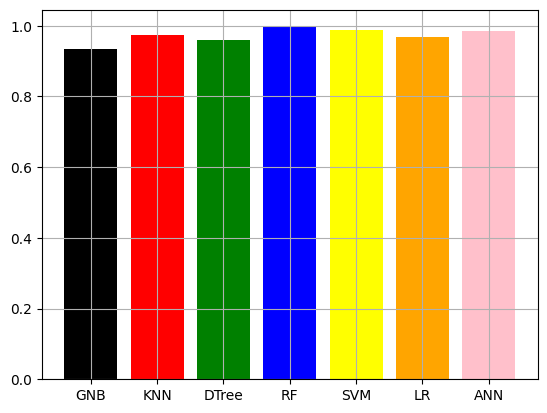

In [105]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb,acc_train_knn,acc_train_dtree,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
title = ["GNB","KNN","DTree","RF","SVM","LR","ANN"]

colors = ['black',"red","green","blue","yellow","orange","pink"]
plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()

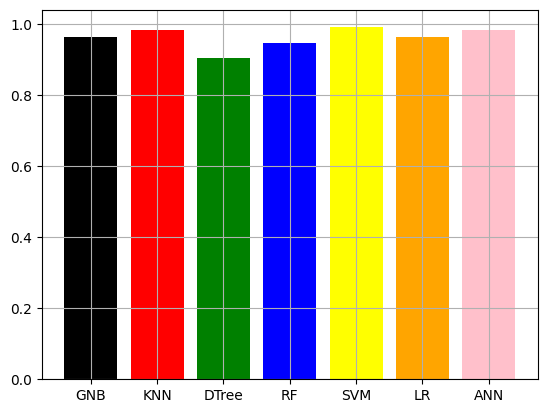

In [107]:
import matplotlib.pyplot as plt

acc_test = [acc_test_gnb,acc_test_knn,acc_test_dtree,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]
title = ["GNB","KNN","DTree","RF","SVM","LR","ANN"]

colors = ['black',"red","green","blue","yellow","orange","pink"]
plt.bar(title,acc_test,color=colors)
plt.grid()
plt.show()

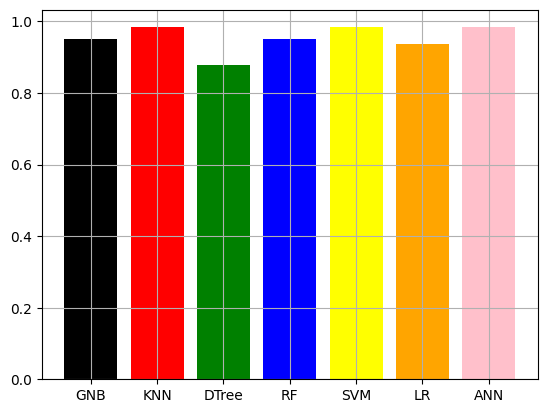

In [108]:
import matplotlib.pyplot as plt

pr_test = [precision_gnb,precision_knn,precision_dtree,precision_rf,precision_svm,precision_lr,precision_ann]
title = ["GNB","KNN","DTree","RF","SVM","LR","ANN"]

colors = ['black',"red","green","blue","yellow","orange","pink"]
plt.bar(title,pr_test,color=colors)
plt.grid()
plt.show()

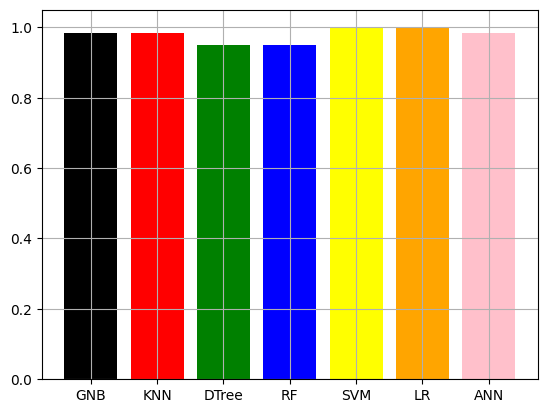

In [109]:
import matplotlib.pyplot as plt

recall_test = [recall_gnb,recall_knn,recall_dtree,recall_rf,recall_svm,recall_lr,recall_ann]
title = ["GNB","KNN","DTree","RF","SVM","LR","ANN"]

colors = ['black',"red","green","blue","yellow","orange","pink"]
plt.bar(title,recall_test,color=colors)
plt.grid()
plt.show()